In [183]:
import tensorflow as tf
import numpy as np
import random
from tensorflow.python.keras import models
from tensorflow.python.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
import matplotlib.pyplot as plt


In [70]:
#load configs 
C11 = np.load('C1_1.npy')
C12 = np.load('C1_3.npy')
C151 = np.load('C15_1.npy')
C152 = np.load('C15_3.npy')
C151 = np.load('C15_1.npy')
C152 = np.load('C15_2.npy')
C21 = np.load('C2_1.npy')
C22 = np.load('C2_3.npy')
C251 = np.load('C25_1.npy')
C252 = np.load('C25_2.npy')
C31 = np.load('C3_1.npy')
C32 = np.load('C3_2.npy')
C351 = np.load('C35_1.npy')
C352 = np.load('C35_2.npy')
C41 = np.load('C4_1.npy')
C42 = np.load('C4_2.npy')

In [101]:
def mag_class(S):
    #input: a Config S
    #output: a class c , c=0 non magnetized , c=1 magnetised
    c = int((np.sign(np.abs(np.mean(S))-0.5)+1)/2)
    return c

In [102]:
Conf_mag_train = [] 
target_mag_train = []
Conf_mag_test = [] 
target_mag_test = []

l1 = np.arange(1000)
random.shuffle(l1)
idx = 0
for i in range(1000):
    idx = l1[i]
    if i<800:
        Conf_mag_train += [(C11[idx]+1)/2] #input 0,1 better for the CNN
        target_mag_train += [mag_class(C11[idx])] 
        Conf_mag_train += [(C12[idx]+1)/2] #input 0,1 better for the CNN
        target_mag_train += [mag_class(C12[idx])] 
    
    else:
        Conf_mag_test += [(C11[idx]+1)/2] 
        target_mag_test += [mag_class(C11[idx])] 
        Conf_mag_test += [(C12[idx]+1)/2] 
        target_mag_test += [mag_class(C12[idx])] 

l15 = np.arange(1000)
random.shuffle(l15)
idx = 0
for i in range(1000):
    idx = l15[i]
    if i<800:
        Conf_mag_train += [(C151[idx]+1)/2] 
        target_mag_train += [mag_class(C151[idx])]
        Conf_mag_train += [(C152[idx]+1)/2] 
        target_mag_train += [mag_class(C152[idx])]
       
    else:
        Conf_mag_test += [(C151[idx]+1)/2] #input 0,1 better for the CNN
        target_mag_test += [mag_class(C151[idx])] 
        Conf_mag_test += [(C152[idx]+1)/2] #input 0,1 better for the CNN
        target_mag_test += [mag_class(C152[idx])] 
        
l3 = np.arange(1000)
random.shuffle(l3)
idx = 0
for i in range(1000):
    idx = l3[i]
    if i<800:
        Conf_mag_train += [(C31[idx]+1)/2] #input 0,1 better for the CNN
        target_mag_train += [mag_class(C31[idx])]
        
    else:
        Conf_mag_test += [(C31[idx]+1)/2] 
        target_mag_test += [mag_class(C31[idx])] 
        

l35 = np.arange(1000)
random.shuffle(l35)
idx = 0
for i in range(1000):
    idx = l35[i]
    if i<800:
        Conf_mag_train += [(C351[idx]+1)/2] #input 0,1 better for the CNN
        target_mag_train += [mag_class(C351[idx])]
        
    else:
        Conf_mag_test += [(C351[idx]+1)/2] 
        target_mag_test += [mag_class(C351[idx])]

    
l4 = np.arange(1000)
random.shuffle(l4)
idx = 0
for i in range(1000):
    idx = l4[i]
    if i<800:
        Conf_mag_train += [(C41[idx]+1)/2] #input 0,1 better for the CNN
        target_mag_train += [mag_class(C41[idx])] 
        
    else:
        Conf_mag_test += [(C41[idx]+1)/2] 
        target_mag_test += [mag_class(C41[idx])]         

for i in range(1000):
    Conf_mag_test += [(C21[i]+1)/2] 
    target_mag_test += [mag_class(C21[i])]
    
    Conf_mag_test += [(C22[i]+1)/2] 
    target_mag_test += [mag_class(C22[i])]
    
    Conf_mag_test += [(C251[i]+1)/2] 
    target_mag_test += [mag_class(C251[i])] 
    
    Conf_mag_test += [(C252[i]+1)/2] 
    target_mag_test += [mag_class(C252[i])]

#debug type pb
Conf_mag_train = np.array(Conf_mag_train)
target_mag_train = np.array(target_mag_train)



Conf_mag_test = np.array(Conf_mag_test)
target_mag_test = np.array(target_mag_test)

#shapping for the CNN 
Conf_mag_train = Conf_mag_train.reshape(Conf_mag_train.shape[0], 40, 40, 1)
Conf_mag_test = Conf_mag_test.reshape(Conf_mag_test.shape[0], 40, 40, 1)




In [211]:
model1 = models.Sequential() 
model1.add(Conv2D(4,kernel_size=(4,4), input_shape=(40,40,1)))
model1.add(MaxPooling2D(pool_size=(4,4)))
model1.add(Flatten())
model1.add(Dense(4, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))


In [212]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 37, 37, 4)         68        
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 9, 9, 4)           0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 324)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 4)                 1300      
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 5         
Total params: 1,373
Trainable params: 1,373
Non-trainable params: 0
_________________________________________________________________


In [213]:
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])  

history = model1.fit(Conf_mag_train,target_mag_train,batch_size=100,epochs=5,shuffle=True,
                    validation_data=(Conf_mag_train,target_mag_train))
score = model1.evaluate(Conf_mag_test, target_mag_test)

Train on 5600 samples, validate on 5600 samples
Epoch 1/5
5600/5600 [==============================]5600/5600 [==============================] - 3s 512us/step - loss: 0.3578 - acc: 0.8954 - val_loss: 0.3243 - val_acc: 0.9566

Epoch 2/5
5600/5600 [==============================]5600/5600 [==============================] - 2s 361us/step - loss: 0.3122 - acc: 0.9693 - val_loss: 0.3003 - val_acc: 0.9764

Epoch 3/5
5600/5600 [==============================]5600/5600 [==============================] - 2s 358us/step - loss: 0.2919 - acc: 0.9854 - val_loss: 0.2842 - val_acc: 0.9927

Epoch 4/5
5600/5600 [==============================]5600/5600 [==============================] - 2s 361us/step - loss: 0.2773 - acc: 0.9902 - val_loss: 0.2696 - val_acc: 0.9943

Epoch 5/5
5600/5600 [==============================]5600/5600 [==============================] - 2s 361us/step - loss: 0.2631 - acc: 0.9930 - val_loss: 0.2559 - val_acc: 0.9963

5400/5400 [==============================]5400/5400 [=========

In [106]:
model2 = models.Sequential() 
model2.add(Conv2D(2,kernel_size=(4,4), input_shape=(40,40,1)))
model2.add(MaxPooling2D(pool_size=(4,4)))
model2.add(Flatten())
model2.add(Dense(4, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 37, 37, 2)         34        
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 9, 9, 2)           0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 162)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 4)                 652       
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 5         
Total params: 691
Trainable params: 691
Non-trainable params: 0
_________________________________________________________________


In [112]:
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])  

history = model2.fit(Conf_mag_train,target_mag_train,batch_size=100,epochs=5,shuffle=True,
                    validation_data=(Conf_mag_train,target_mag_train))
score = model2.evaluate(Conf_mag_test, target_mag_test)

Train on 5600 samples, validate on 5600 samples
Epoch 1/5
5600/5600 [==============================]5600/5600 [==============================] - 2s 403us/step - loss: 0.5068 - acc: 0.7584 - val_loss: 0.2703 - val_acc: 0.9045

Epoch 2/5
5600/5600 [==============================]5600/5600 [==============================] - 2s 343us/step - loss: 0.1817 - acc: 0.9613 - val_loss: 0.1245 - val_acc: 0.9800

Epoch 3/5
5600/5600 [==============================]5600/5600 [==============================] - 2s 340us/step - loss: 0.0970 - acc: 0.9829 - val_loss: 0.0743 - val_acc: 0.9838

Epoch 4/5
5600/5600 [==============================]5600/5600 [==============================] - 2s 346us/step - loss: 0.0629 - acc: 0.9845 - val_loss: 0.0539 - val_acc: 0.9850 ETA: 0s - loss: 0.0734

Epoch 5/5
5600/5600 [==============================]5600/5600 [==============================] - 2s 344us/step - loss: 0.0470 - acc: 0.9861 - val_loss: 0.0408 - val_acc: 0.9889

5400/5400 [============================

In [116]:
model3 = models.Sequential() 
model3.add(Conv2D(2,kernel_size=(4,4), input_shape=(40,40,1)))
model3.add(MaxPooling2D(pool_size=(4,4)))
model3.add(Flatten())
model3.add(Dense(2, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 37, 37, 2)         34        
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 9, 9, 2)           0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 162)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 2)                 326       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 3         
Total params: 363
Trainable params: 363
Non-trainable params: 0
_________________________________________________________________


In [117]:
model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])  

history = model3.fit(Conf_mag_train,target_mag_train,batch_size=100,epochs=5,shuffle=True,
                    validation_data=(Conf_mag_train,target_mag_train))
score = model3.evaluate(Conf_mag_test, target_mag_test)

Train on 5600 samples, validate on 5600 samples
Epoch 1/5
5600/5600 [==============================]5600/5600 [==============================] - 2s 432us/step - loss: 0.6672 - acc: 0.6882 - val_loss: 0.6040 - val_acc: 0.7104

Epoch 2/5
5600/5600 [==============================]5600/5600 [==============================] - 2s 382us/step - loss: 0.5337 - acc: 0.8523 - val_loss: 0.4728 - val_acc: 0.9493

Epoch 3/5
5600/5600 [==============================]5600/5600 [==============================] - 2s 352us/step - loss: 0.4372 - acc: 0.9693 - val_loss: 0.4043 - val_acc: 0.9811 ETA: 0s - loss: 0.4499 - acc

Epoch 4/5
5600/5600 [==============================]5600/5600 [==============================] - 2s 350us/step - loss: 0.3792 - acc: 0.9836 - val_loss: 0.3563 - val_acc: 0.9807

Epoch 5/5
5600/5600 [==============================]5600/5600 [==============================] - 2s 348us/step - loss: 0.3394 - acc: 0.9900 - val_loss: 0.3251 - val_acc: 0.9934

5400/5400 [======================

In [ ]:
#the model 3  seems to having the best compromise between the number of params and accuracy vs epoch

In [107]:
C1 = []
C15 =[]
C2 = []
C25=[]
C3 = []
C35 = []
C4 = []
T1 = []
T15 =[]
T2 = []
T25=[]
T3 = []
T35 = []
T4 = []

for i in range(500):
    C1 =C1+ [(C11[i+500]+1)/2]+[(C12[i+500]+1)/2]
    T1 = T1 + [mag_class(C11[i+500])]+[mag_class(C12[i+500])]
    C15 =C15+ [(C151[i+500]+1)/2]+[(C152[i+500]+1)/2]
    T15 = T15 + [mag_class(C151[i+500])]+[mag_class(C152[i+500])]
    C2 = C2+ [(C21[i+500]+1)/2]+[(C22[i+500]+1)/2]
    T2 = T2 + [mag_class(C21[i+500])]+[mag_class(C22[i+500])]
    C25=C25+ [(C251[i+500]+1)/2]+[(C252[i+500]+1)/2]
    T25= T25 + [mag_class(C251[i+500])]+[mag_class(C252[i+500])]
    C3 = C3+ [(C31[i+500]+1)/2]+[(C32[i+500]+1)/2]
    T3 = T3 + [mag_class(C31[i+500])]+[mag_class(C32[i+500])]
    C35 = C35 + [(C351[i+500]+1)/2]+[(C352[i+500]+1)/2]
    T35 = T35 + [mag_class(C351[i+500])]+[mag_class(C352[i+500])]
    C4 = C4+ [(C41[i+500]+1)/2]+[(C42[i+500]+1)/2]
    T4 = T4 + [mag_class(C41[i+500])]+[mag_class(C42[i+500])]
    

C1 = np.array(C1)
T1 = np.array(T1)
C15 = np.array(C15)
T15 = np.array(T15)
C2 = np.array(C2)
T2 = np.array(T2)
C25 = np.array(C25)
T25 = np.array(T25)
C3 = np.array(C3)
T3 = np.array(T3)
C35 = np.array(C35)
T35 = np.array(T35)
C4 = np.array(C4)
T4 = np.array(T4)

C1 = C1.reshape(C1.shape[0], 40, 40, 1)
C15 = C15.reshape(C15.shape[0], 40, 40, 1)
C2 = C2.reshape(C2.shape[0], 40, 40, 1)
C25 = C25.reshape(C25.shape[0], 40, 40, 1)
C3 = C3.reshape(C3.shape[0], 40, 40, 1)
C35 = C35.reshape(C35.shape[0], 40, 40, 1)
C4 = C4.reshape(C4.shape[0], 40, 40, 1)



In [217]:
OutputT1m3 = model3.predict(C1),
OutputT15m3 = model3.predict(C15)
OutputT2m3 = model3.predict(C2)
OutputT25m3 = model3.predict(C25)
OutputT3m3 = model3.predict(C3)
OutputT35m3 = model3.predict(C35)
OutputT4m3 = model3.predict(C4)



In [218]:

p1m3 = np.mean(OutputT1m3)
p15m3 = np.mean(OutputT15m3)
p2m3 = np.mean(OutputT2m3)
p25m3 = np.mean(OutputT25m3)
p3m3 = np.mean(OutputT3m3)
p35m3 = np.mean(OutputT35m3)
p4m3 = np.mean(OutputT4m3)


T  = np.array([1,1.5,2,2.5,3,3.5,4])
Pm3 = np.array([p1m3,p15m3,p2m3,p25m3,p3m3,p35m3,p4m3])

#std
s = 1/np.sqrt(1000)
stdm3 = s*1.96*np.array([np.std(OutputT1m3),np.std(OutputT15m3),np.std(OutputT2m3),np.std(OutputT25m3),np.std(OutputT3m3),np.std(OutputT35m3),np.std(OutputT4m3)])


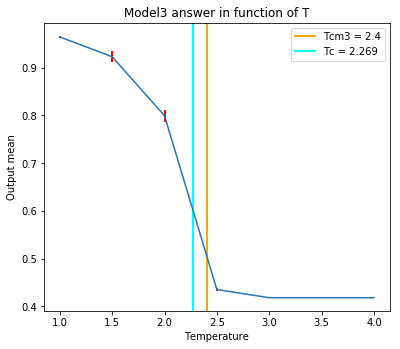

In [209]:
def interpolm3(x):
    return p2m3+(x-2)*2*(p25m3-p2m3)

xabs = np.linspace(2,2.5,100)
yim3 = interpolm3(xabs)

Tcm3 = xabs[np.argmin((yim3-0.5)**2)]
Tc = 2.269
fig = plt.figure(figsize = (6, 5))
plt.gcf().subplots_adjust(left = 0.1, bottom = 0.1,
                       right = 0.9, top = 0.9, wspace =0.6, hspace = 0.3)


axes = fig.add_subplot(1,1,1)
axes.set_xlabel('Temperature')
axes.set_ylabel('Output mean')
axes.axvline(Tcm3,color="orange",linewidth=2.0, label = "Tcm3 = 2.4")
axes.axvline(Tc,color="cyan",linewidth=2.0, label = "Tc = 2.269")
axes.set_title('Model3 answer in function of T')
axes.errorbar(T,Pm3,stdm3,ecolor = 'red', elinewidth = 2, capthick = 8)
axes.legend()

plt.show()